0.19664021510010196

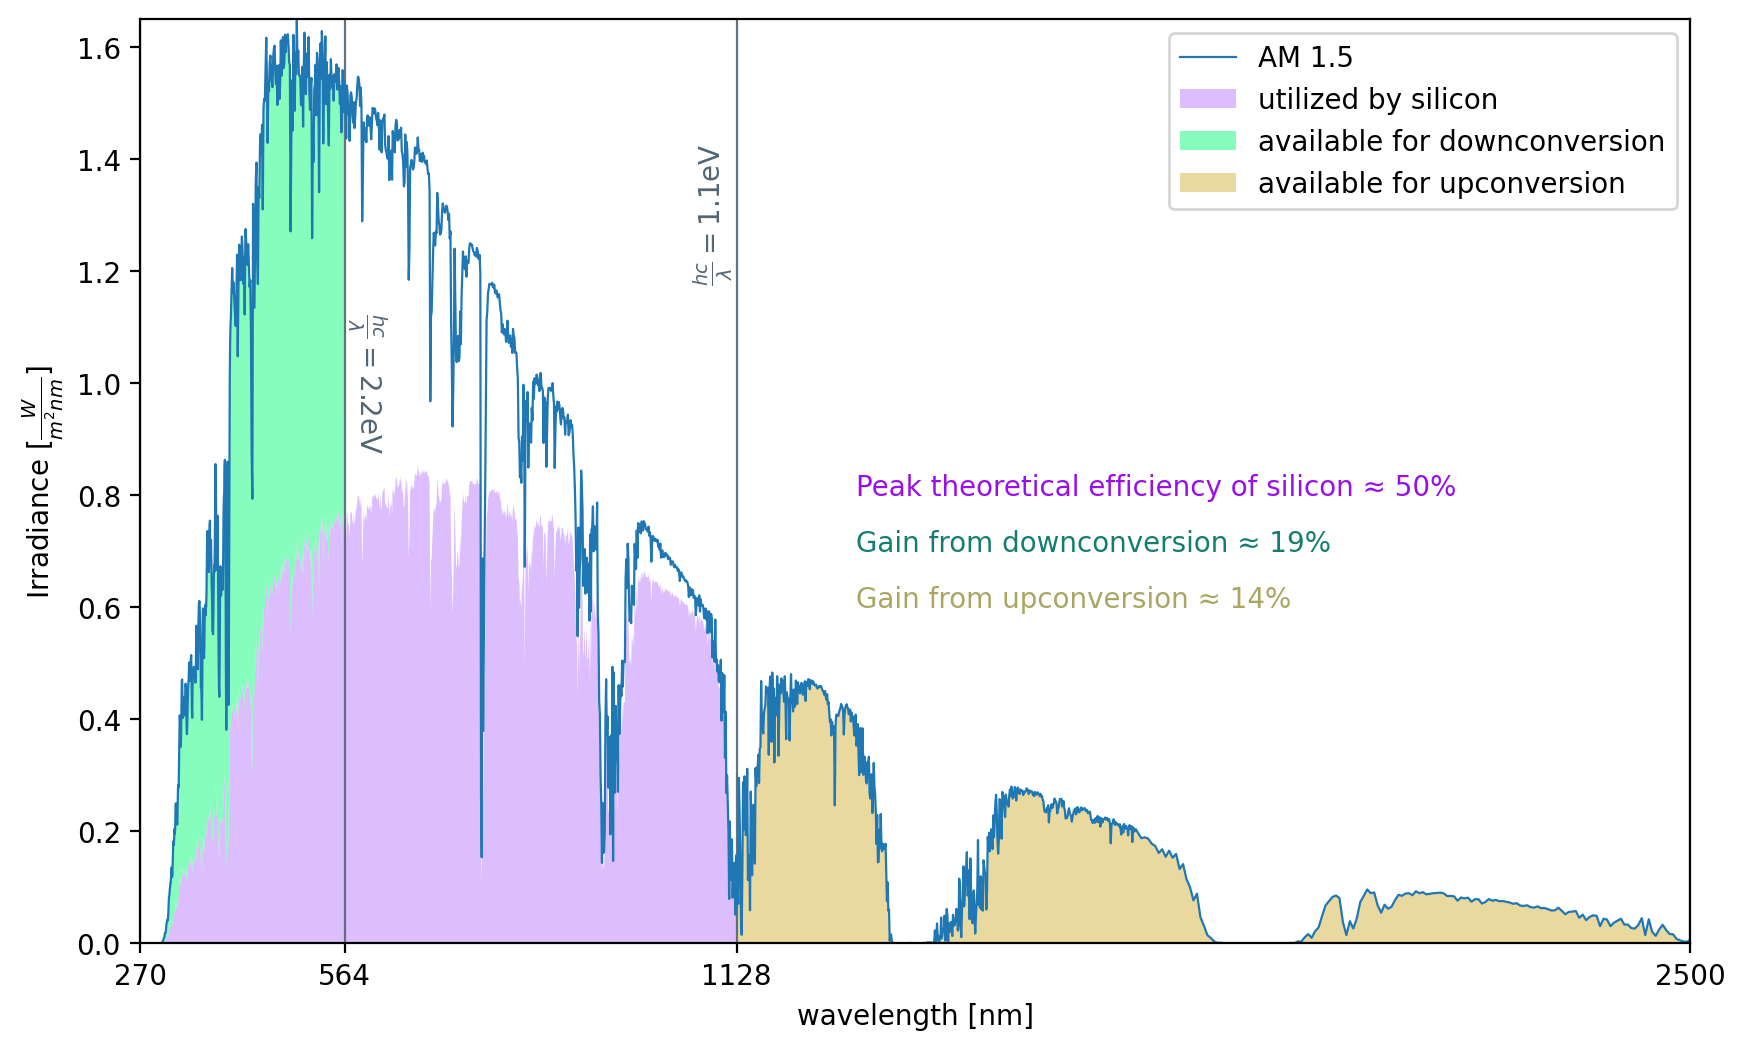

In [180]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%config InlineBackend.figure_format = 'retina'

df = pd.read_excel("./astmg173.xls", sheet_name="SMARTS2", header=1)

wavelengths = df[df.columns[0]]
irradiance = df[df.columns[2]]
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(wavelengths, irradiance, linewidth=0.8, label="AM 1.5")
ax.set_xlim(280, 2500)
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel(r"Irradiance [$ \frac{{W}}{{m^2 nm}} $]")

ax.set_ylim(0, 1.65)

band_gap = 1.1  # eV
h = 4.135667696e-15  # planck_constant
c = 3e8

lambda_cutoff = h * c / band_gap * 1e9


def silicon(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)
    if energy < band_gap:
        return 0

    return irrad * band_gap / energy


def available_for_dc(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)

    if energy < band_gap * 2:
        return silicon(irrad, wavelength)
    return irrad


def available_for_uc(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)

    if energy < 1.1:
        return irrad
    return 0


silicon_y = [
    silicon(irradiance[idx], wavelength) for (idx, wavelength) in enumerate(wavelengths)
]

dc_y = [
    available_for_dc(irradiance[idx], wavelength)
    for (idx, wavelength) in enumerate(wavelengths)
]

uc_y = [
    available_for_uc(irradiance[idx], wavelength)
    for (idx, wavelength) in enumerate(wavelengths)
]

# ax.plot(wavelengths, silicon_y, color="xkcd:lilac",)
ax.fill_between(
    wavelengths,
    silicon_y,
    0,
    color="xkcd:lilac",
    alpha=0.7,
    linewidth=0,
    label="utilized by silicon",
)
ax.fill_between(
    wavelengths,
    dc_y,
    silicon_y,
    color="xkcd:sea green",
    alpha=0.7,
    linewidth=0,
    label="available for downconversion",
)

ax.fill_between(
    wavelengths,
    uc_y,
    0,
    color="xkcd:sand",
    alpha=0.7,
    linewidth=0,
    label="available for upconversion",
)

ax.legend()

ax.xaxis.grid(True, which="major", alpha=0.9, color="xkcd:slate")
ax.set_xticks(
    [270, lambda_cutoff / 2, lambda_cutoff, 2500],
)
ax.annotate(
    r"$\frac{hc}{\lambda} = 1.1 \mathrm{eV}$",
    (lambda_cutoff - 65, 1.2),
    rotation=90,
    color="xkcd:slate",
)
ax.annotate(
    r"$\frac{hc}{\lambda} = 2.2 \mathrm{eV}$",
    (lambda_cutoff / 2, 0.9),
    rotation=-90,
    color="xkcd:slate",
)

ax.annotate(
    "Peak theoretical efficiency of silicon ≈ 50%", (1300, 0.8), color="xkcd:violet"
)
ax.annotate("Gain from downconversion ≈ 19%", (1300, 0.7), color="xkcd:blue green")
ax.annotate("Gain from upconversion ≈ 14%", (1300, 0.6), color="xkcd:khaki")

np.trapz(uc_y) / np.trapz(irradiance)

# np.trapz(silicon_y)
np.trapz(np.array(dc_y) - silicon_y) / np.trapz(irradiance)

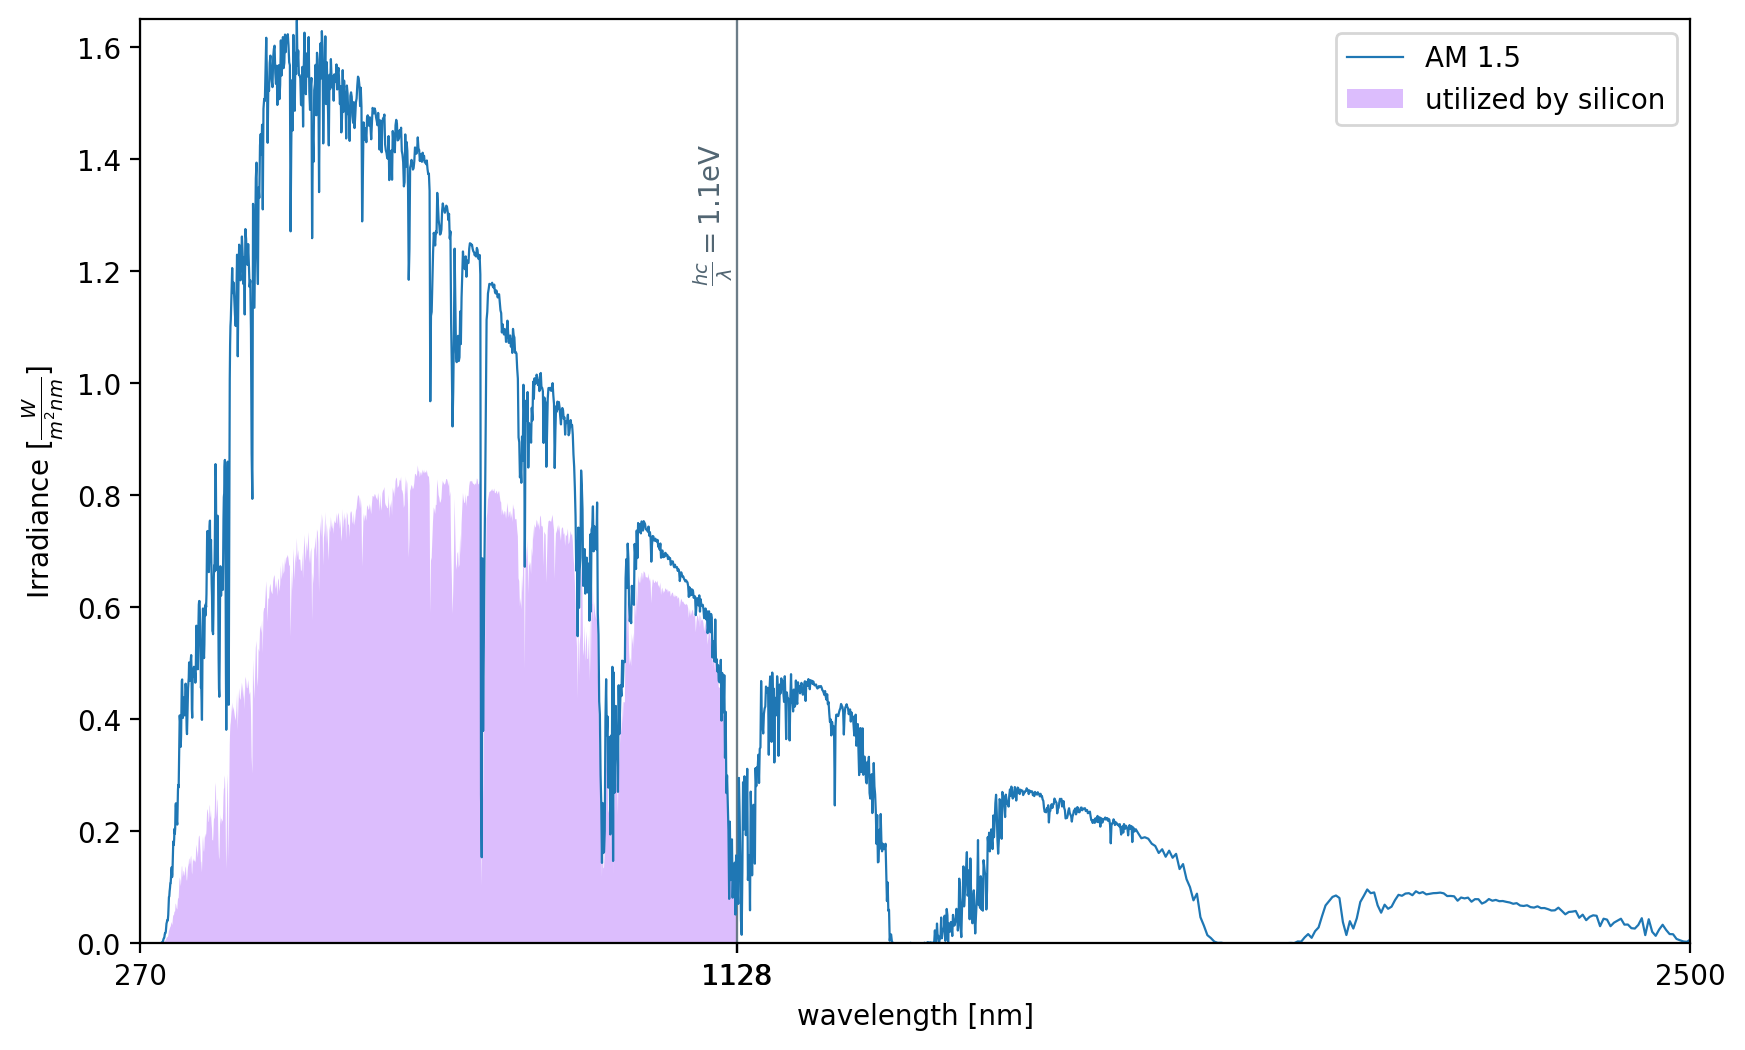

In [212]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%config InlineBackend.figure_format = 'retina'

df = pd.read_excel("./astmg173.xls", sheet_name="SMARTS2", header=1)

wavelengths = df[df.columns[0]]
irradiance = df[df.columns[2]]
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(wavelengths, irradiance, linewidth=0.8, label="AM 1.5")
ax.set_xlim(280, 2500)
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel(r"Irradiance [$ \frac{{W}}{{m^2 nm}} $]")

ax.set_ylim(0, 1.65)

band_gap = 1.1  # eV
h = 4.135667696e-15  # planck_constant
c = 3e8

lambda_cutoff = h * c / band_gap * 1e9


def silicon(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)
    if energy < band_gap:
        return 0

    return irrad * band_gap / energy


def available_for_dc(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)

    if energy < band_gap * 2:
        return silicon(irrad, wavelength)
    return irrad


def available_for_uc(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)

    if energy < 1.1:
        return irrad
    return 0


silicon_y = [
    silicon(irradiance[idx], wavelength) for (idx, wavelength) in enumerate(wavelengths)
]

dc_y = [
    available_for_dc(irradiance[idx], wavelength)
    for (idx, wavelength) in enumerate(wavelengths)
]

uc_y = [
    available_for_uc(irradiance[idx], wavelength)
    for (idx, wavelength) in enumerate(wavelengths)
]

# ax.plot(wavelengths, silicon_y, color="xkcd:lilac",)
ax.fill_between(
    wavelengths,
    silicon_y,
    0,
    color="xkcd:lilac",
    alpha=0.7,
    linewidth=0,
    label="utilized by silicon",
)
ax.set_xticks(
    [270, 1128, lambda_cutoff, 2500],
)

ax.xaxis.grid(True, which="major", alpha=0.6, color="xkcd:slate")

ax.annotate(
    r"$\frac{hc}{\lambda} = 1.1 \mathrm{eV}$",
    (lambda_cutoff - 65, 1.2),
    rotation=90,
    color="xkcd:slate",
)
ax.legend()

0.19664021510010196

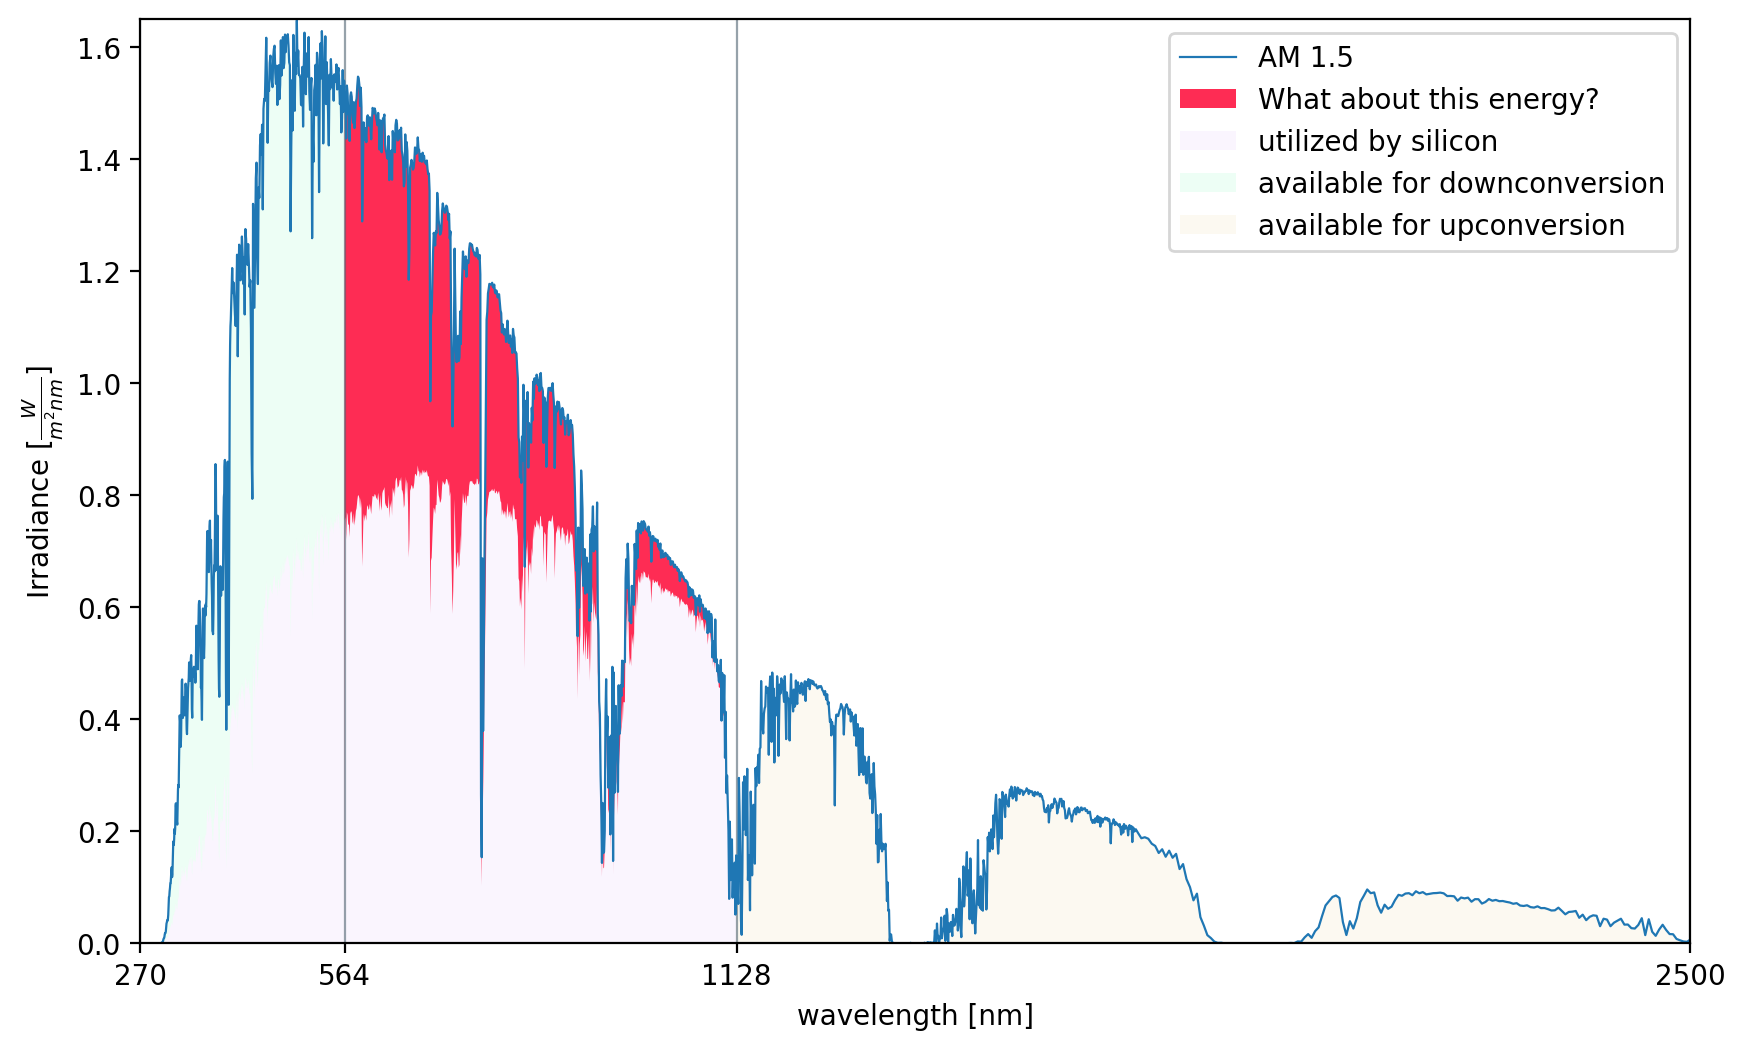

In [207]:

%config InlineBackend.figure_format = 'retina'

df = pd.read_excel("./astmg173.xls", sheet_name="SMARTS2", header=1)

wavelengths = df[df.columns[0]]
irradiance = df[df.columns[2]]
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(wavelengths, irradiance, linewidth=0.8, label="AM 1.5")
ax.set_xlim(280, 2500)
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel(r"Irradiance [$ \frac{{W}}{{m^2 nm}} $]")

ax.set_ylim(0, 1.65)

band_gap = 1.1  # eV
h = 4.135667696e-15  # planck_constant
c = 3e8

lambda_cutoff = h * c / band_gap * 1e9


def silicon(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)
    if energy < band_gap:
        return 0

    return irrad * band_gap / energy


def available_for_dc(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)

    if energy < band_gap * 2:
        return silicon(irrad, wavelength)
    return irrad


def available_for_uc(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)

    if energy < 1.1:
        return irrad
    return 0


def remains_top(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)

    if energy > 1.1 and energy < 2.2:
        return irrad
    return 0


def remains_bottom(irrad, wavelength):
    energy = h * c / (wavelength * 1e-9)

    if energy > 1.1 and energy < 2.2:
        return silicon(irrad, wavelength)
    return 0


silicon_y = [
    silicon(irradiance[idx], wavelength) for (idx, wavelength) in enumerate(wavelengths)
]

dc_y = [
    available_for_dc(irradiance[idx], wavelength)
    for (idx, wavelength) in enumerate(wavelengths)
]

uc_y = [
    available_for_uc(irradiance[idx], wavelength)
    for (idx, wavelength) in enumerate(wavelengths)
]

remaining_top = [
    remains_top(irradiance[idx], wavelength)
    for (idx, wavelength) in enumerate(wavelengths)
]
remaining_bottom = [
    remains_bottom(irradiance[idx], wavelength)
    for (idx, wavelength) in enumerate(wavelengths)
]

ax.fill_between(
    wavelengths,
    remaining_top,
    remaining_bottom,
    color="xkcd:reddish pink",
    alpha=1,
    linewidth=0,
    label="What about this energy?",
)

# ax.plot(wavelengths, silicon_y, color="xkcd:lilac",)

# ax.plot(wavelengths, silicon_y, color="xkcd:lilac",)
ax.fill_between(
    wavelengths,
    silicon_y,
    0,
    color="xkcd:lilac",
    alpha=0.1,
    linewidth=0,
    label="utilized by silicon",
)
ax.fill_between(
    wavelengths,
    dc_y,
    silicon_y,
    color="xkcd:sea green",
    alpha=0.1,
    linewidth=0,
    label="available for downconversion",
)

ax.fill_between(
    wavelengths,
    uc_y,
    0,
    color="xkcd:sand",
    alpha=0.1,
    linewidth=0,
    label="available for upconversion",
)


ax.legend()

ax.xaxis.grid(True, which="major", alpha=0.6, color="xkcd:slate")
ax.set_xticks(
    [270, lambda_cutoff / 2, lambda_cutoff, 2500],
)
# ax.annotate(
#     r"$\frac{hc}{\lambda} = 1.1 \mathrm{eV}$",
#     (lambda_cutoff - 65, 1.2),
#     rotation=90,
#     color="xkcd:slate",
# )
# ax.annotate(
#     r"$\frac{hc}{\lambda} = 2.2 \mathrm{eV}$",
#     (lambda_cutoff / 2, 0.9),
#     rotation=-90,
#     color="xkcd:slate",
# )

# ax.annotate(
#     "Peak theoretical efficiency of silicon ≈ 50%", (1300, 0.8), color="xkcd:violet"
# )
# ax.annotate("Gain from downconversion ≈ 19%", (1300, 0.7), color="xkcd:blue green")
# ax.annotate("Gain from upconversion ≈ 14%", (1300, 0.6), color="xkcd:khaki")

np.trapz(uc_y) / np.trapz(irradiance)

# np.trapz(silicon_y)
np.trapz(np.array(dc_y) - silicon_y) / np.trapz(irradiance)

$ 1.1\mathrm{\ eV} = \dfrac{hc}{\lambda} \longrightarrow \lambda = 1128\mathrm{\ nm}
$

$ I_{Si}(\lambda) = I_{AM\ 1.5}(\lambda) \times \dfrac{1.1\mathrm{\ eV}}{\tfrac{hc}{\lambda}} $